# 타이타닉 생존자 예측 데이터

https://dacon.io/competitions/open/235539/data

## 데이터 설명

- Passengerid : 탑승자 데이터 일련번호


- survived : 생존여부, 0=사망, 1= 생존


- pclass : 티켓의 선실 등급, 1 = 일등석, 2 = 이등석, 3 = 삼등석


- sex : 탑승자 성별


- name : 탑승자 이름


- Age : 탑승자 나이


- sibsp : 같이 탑승한 부모님 또는 어린이 인원수


- ticket : 티켓번호


- fare : 요금


- cabin : 선실 번호


- embarked : 중간 정착 항구 C = Cherbourg, Q = Queenstown, S = Southampton

## 라이브러리 입력

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

### 데이터 불러오기

In [6]:
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 데이터 살펴보기

In [8]:
df.shape

(891, 12)

총 891개의 데이터 & 12개의 변수

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- type : float 2개, int 5개, object 5개 
- 결측치 : Age 는 177개, Cabin은 787개, Embarked는 2개

### 결측치 처리

fillna() 함수를 사용해 간단하게 Null 값을 평균 또는 고정 값으로 변경한다

- Age -> 평균나이
- 나머지 column -> "N"

In [11]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Cabin'].fillna('N',inplace=True)
df['Embarked'].fillna('N',inplace=True)

In [12]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [15]:
df.isnull().sum().sum()

0

In [18]:
print('데이터 세트 Null 값 개수 :')

데이터 세트 Null 값 개수 :


In [19]:
print('데이터 세트 Null 값 개수 :',df.isnull().sum().sum())

데이터 세트 Null 값 개수 : 0


### 문자열 변수 탐색 및 처리

In [20]:
# Sex 값 분포:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [22]:
# Cabin
df['Cabin'].value_counts()


N              687
B96 B98          4
C23 C25 C27      4
G6               4
F33              3
              ... 
D15              1
D46              1
C30              1
C106             1
A24              1
Name: Cabin, Length: 148, dtype: int64

In [23]:
# Embarked
df['Embarked'].value_counts()

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64

- Cabin(선실)의 경우 N이 687건으로 가장 많음 & 속성값이 제대로 정리가 되지 않은 것 같음


- Cabin의 경우 선실 번호 중 선실 등급을 나타내는 첫 번째 알파벳이 중요해 보임


- 당시 시절을 생각하면 부자(일등실)가 더 살아날 확률이 높았을 것

#### Cabin 변수는 앞 문자만 출력

In [24]:
df['Cabin']=df['Cabin'].str[:1]

In [25]:
df['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

## 데이터 탐색
모든 변수를 하나하나 탐색을 하지는 않는다. 다음과 같은 정보를 활용하여 탐색한다. 

- 사고가 날 경우 아이들, 노약자, 여성이 제일 먼저 구조 대상이다
- 부자나 유명인이 우선 구조될 확률이 높다


### 성별에 따른 생존자수

In [26]:
df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

- 여성 : 74.2 % 가 생존
- 남성 : 18.8 % 가 생존

#### Seaborn 패키지를 이용한 시각화
Seaborn 패키지는 맷플랏립을 기반하고 있지만, 좀 더 Pandas와 연동이 쉬우며 세련된 이미지를 보여준다

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

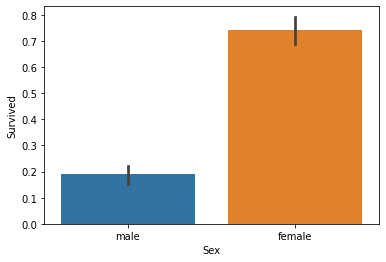

In [28]:
sns.barplot(x="Sex",y="Survived",data=df)

### 객실 등급에 따른 데이터 탐색
- 객실 등급은 부를 측정할 수 있는 속성으로 판단된다.
- 효율적인 분석을 하기 위해서 단순히 객실 등급과 성별을 함께 고려하여 생존확률을 살펴본다

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

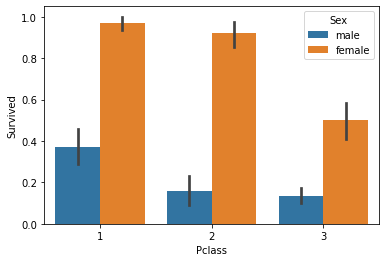

In [29]:
sns.barplot(x="Pclass",y="Survived",hue="Sex",data=df)

- 여성의 경우 일, 이등실에 따른 생존 확률의 차이는 크지 않아 보이나, 삼등실의 경우 생존 확률이 상대적으로 많이 떨어짐을 알 수 있다. 

- 남성의 경우 일등실의 생존확룰이 나머지 객실보다 월등히 높음을 볼 수 있다.

### Age 나이에 따른 생존확률
- Age의 경우 값 종류가 많기 때문에 범위별로 분류해 카테고리 값을 할당

- 0 ~ 5세 => 0 / 6 ~ 12세 => 1 / 13 ~ 18세 => 2 / 19 ~ 25세 => 3 / 26 ~ 35세 => 4 / 36 ~ 60세 => 5 / 61세 ~ => 6 / -1이하의 오류 값 => 99

In [38]:
df['age_cat']=0
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,N,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,N,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,N,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,N,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,N,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,C,0


In [39]:
df['age_cat']=df['age_cat']+(df['Age']>=6)*1
df['age_cat']=df['age_cat']+(df['Age']>=13)*1
df['age_cat']=df['age_cat']+(df['Age']>=19)*1
df['age_cat']=df['age_cat']+(df['Age']>=26)*1
df['age_cat']=df['age_cat']+(df['Age']>=36)*1
df['age_cat']=df['age_cat']+(df['Age']>=61)*1

In [40]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,N,S,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,C,5
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,N,S,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C,S,4
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,N,S,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,N,S,4
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B,S,3
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,N,S,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,C,4


In [43]:
# 오류값은 없음을 알 수 있다
df[(df['age_cat']<1)&(df['Age']<0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_cat


<AxesSubplot:xlabel='age_cat', ylabel='Survived'>

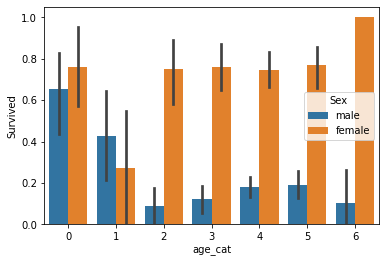

In [44]:
sns.barplot(x='age_cat',y='Survived',hue='Sex',data=df)

- 범주 1(6~12)은 여성의 경우가 오히려 생존확률이 낮음을 알 수 있다.
- 범주 6의 여성의 생존율이 매우 높음을 알 수 있다.

## 문자열 카테고리 변수를 숫자형 카테고리 변수로 변환
### LabelEncoder 사용

In [45]:
from sklearn import preprocessing

In [47]:
label_cabin=preprocessing.LabelEncoder()
label_cabin=label_cabin.fit(df['Cabin'])
df['Cabin']=label_cabin.transform(df['Cabin'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,7,S,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,2,C,5
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,7,S,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,2,S,4
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,7,S,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,7,S,4
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,1,S,3
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,7,S,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,2,C,4


In [48]:
label_sex=preprocessing.LabelEncoder()
label_sex=label_sex.fit(df['Sex'])
df['Sex']=label_sex.transform(df['Sex'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,7,S,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,2,C,5
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,7,S,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,2,S,4
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,7,S,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,7,S,4
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,1,S,3
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,7,S,4
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,2,C,4


In [49]:
label_Embarked=preprocessing.LabelEncoder()
label_sex=label_Embarked.fit(df['Embarked'])
df['Embarked']=label_Embarked.transform(df['Embarked'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,7,3,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,2,0,5
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,7,3,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,2,3,4
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,7,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,7,3,4
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,1,3,3
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,7,3,4
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,2,0,4


In [50]:
df_new=df.drop(columns=['PassengerId','Name','Ticket'])
df_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,age_cat
0,0,3,1,22.000000,1,0,7.2500,7,3,3
1,1,1,0,38.000000,1,0,71.2833,2,0,5
2,1,3,0,26.000000,0,0,7.9250,7,3,4
3,1,1,0,35.000000,1,0,53.1000,2,3,4
4,0,3,1,35.000000,0,0,8.0500,7,3,4
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,7,3,4
887,1,1,0,19.000000,0,0,30.0000,1,3,3
888,0,3,0,29.699118,1,2,23.4500,7,3,4
889,1,1,1,26.000000,0,0,30.0000,2,0,4
